In [10]:
from __future__ import print_function
from __future__ import division
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# parameters

strip_width = 0.1 # mm
max_iterations = 10000 # 10k
plot_progress = 0

# geometry

x_step = 0.1*strip_width # mm
z_step = x_step # mm
x_range = strip_width*2 # 2 cm
z_range = x_range # 5 cm
#x_range = 0.1
#z_range  = 0.1



In [11]:
x_values = np.linspace((-x_range), (x_range), int(2*x_range/x_step))
z_values = np.linspace((-z_range),(z_range), int(2*z_range/z_step))

#detector_array = np.zeros((len(x_values),len(z_values)), dtype=np.float)
detector_array  = [[0 for x in range(len(x_values))] for z in range(len(z_values))] 
detector_array  = np.zeros((len(x_values),len(z_values)))
#print(detector_array)


In [12]:
# strip edges
high_edge = 0
low_edge = 0
high = []
low = []

#print(x_values)
#print(z_values)

for x_value in x_values:
    if float(x_value) >= float(strip_width/2):
        high.append(x_value)
    if float(x_value) <= float(-strip_width/2):
        low.append(x_value)

In [13]:
high_strip_edge = min(high)
low_strip_edge = max(low)
high_index = np.where(x_values == high_strip_edge)
low_index = np.where(x_values == low_strip_edge)
#x_values = []
#x_values = np.linspace((-x_range), (x_range), (4*x_range/x_step))
#high_index = x_values.index(high_strip_edge)
#low_index = x_values.index(low_strip_edge)
high_index = int(high_index[0][0])
low_index = int(low_index[0][0])
print(high_index)
print(low_index)

24
14


In [14]:
# ?????????????????????????????????

max_x = len(x_values) 
#min_x = min(x_values)
max_z = len(z_values)
#min_z = min(z_values)

# boundary conditions

old = 1
new = 0

##wp = [[[0 for z in range(2)] for x in range(max_x)] for z in range(max_z)]
#print(wp)
wp = np.zeros((2, len(x_values), len(z_values)))
wp[0,low_index:high_index,0] = 1
wp[1,low_index:high_index,0] = 1
#wp[0:0, low_index:] = 0 
#wp[0:high_index, :] = 0
#wp[1:0, low_index:] = 0
#wp[1:high_index, :] = 0
#print(wp)

In [15]:
for x in range(1, (max_x - 1)):
    for z in range(1, (max_z - 1)):
        wp[1,x,z] = 1.0 * z/max_z * x/max_x
        
#print(wp)

In [16]:
print("Calculating Weighting Potential via Relaxation....")
dif_store = np.zeros((max_iterations))
print(dif_store)
for iter in range(0,max_iterations):
    if (old == 0):
        old = 1
        new = 0
    else:
        old = 0
        new = 1
        
    sum_dif = 0
    max_dif = 0

    # reflection symm
    ## w(1,end,:) = w(1,end-1,:); ??

    # loop over internal points of detector grid
    for z in range(0, wp.shape[2] - 2): # X and Y ????
        #print (x)
        for x in range(0, wp.shape[1]-2):
            #print(y)
           
            # new value is average over neigbouring pixels
            wp[new,x,z] = (wp[old,x+1,z] + wp[old,x-1,z] + wp[old,x,z+1] + wp[old,x,z-1]) / 4
        
            # difference in solution between iterations
            dif = wp[old,x,z] - wp[new,x,z]
            if (dif < 0.0):
                dif = -dif
            sum_dif = sum_dif +  dif
            if (max_dif < dif):
                max_dif = dif

    # check for convergence
    if (max_dif < 1e-12):
        print("Solution may have converged...")
        #return 1
    
    # store difference vs. iteration
    dif_store[iter] = sum_dif
    
    # plot intermediate results
    if (plot_progress == 1):
        if ((iter%100) == 0):
            print(iter)
            print(sum_dif)
            plt.subplot(1,2,1)
            contour(np.squeeze(wp[old,:,:]),20)
            plt.subplot(1,2,2)
            contour(np.squeeze(wp[new,:,:]),20)

# get final result
WPout = np.squeeze(wp[0,:,0:max_z]); ##max_z bit

print("DONE")

Calculating Weighting Potential via Relaxation....
[ 0.  0.  0. ...,  0.  0.  0.]
DONE


In [17]:
#plot
print(len(x_values))
print(len(z_values))
print(WPout)

print((WPout.shape[0]))
print((WPout.shape[1]))

plt.cla() 
plt.clf() 

plt.figure(figsize=(10, 5))
plt.contour(z_values, x_values, WPout)
# colorbar ??
#grid on;
#plt.xlabel('z (mm)', 'FontSize', 18)
#plt.ylabel('x (mm)', 'FontSize', 18)
# set(gca, 'FontSize', 16)

plt.figure(figsize=(10, 5))
plt.semilogy(dif_store,'b.-')
#grid on;
#plt.xlabel('Iteration Number', 'FontSize', 18)
#plt.ylabel('Difference', 'FontSize', 18)
#set(gca, 'FontSize', 16)

#plt.figure(figsize=(10, 5))
#plt.xticks(np.arange(0, 14, 0.1))
#plt.axis([0, 3, 0, max(x_values_list)])
#ax = plt.gca()
#ax.grid(color='k', linestyle='-', linewidth=0.5)
#ax.set_autoscale_on(False)

#plt.semilogx(time_nano1, strip6_nano1_662, linestyle='-', marker = 'o', color='red', label = '662keV NanoMCA I')
#plt.semilogx(time_nano2, strip6_nano2_662, linestyle='-', marker = 'o', color='blue', label = '662keV NanoMCA II')

#plt.plot(rate_x_values, rate_y_values, 'g-', label = 'rate function')
#plt.plot(x_values_rej, y_values_rej, 'ro', label = 'rejected')
#plt.legend(loc='upper right', ncol=2)
#plt.title('strip 6')
#plt.xlabel('time (us)')
#plt.ylabel('FWHM (keV)')
#plt.show()

39
39
[[  3.02013834e-04   6.02495191e-04   9.06040186e-04 ...,   5.09100600e-03
    0.00000000e+00   0.00000000e+00]
 [  6.02495191e-04   1.20805665e-03   1.80748801e-03 ...,   1.75336632e-02
    0.00000000e+00   0.00000000e+00]
 [  9.06040186e-04   1.80748801e-03   2.71813766e-03 ...,   2.99828208e-02
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  5.09100600e-03   1.75336632e-02   2.99828208e-02 ...,   6.25970818e-01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
39
39


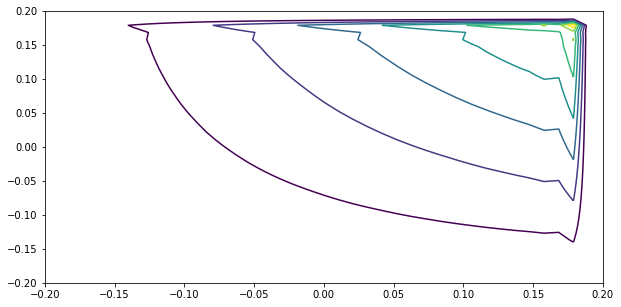

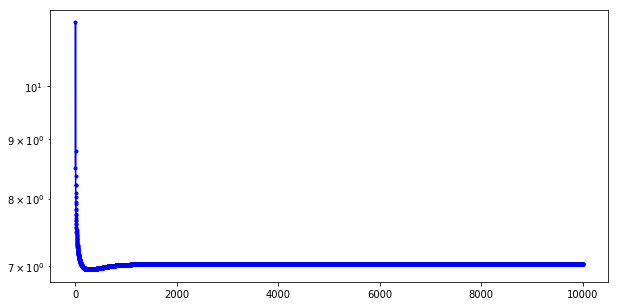

In [18]:
plt.show()